# Diabeties

In [1]:
# Objectives
# 1)Predict if person is diabetes patient or not
# 2)Find most indicative features of diabetes
# 3)Try different classification methods to find highest accuracy


In [2]:
# importing the packages 

In [3]:
import pandas as pd 
import numpy as np


In [4]:
data = pd.read_csv(r"C:\Users\acer\Desktop\diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Giving the info about the data 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe() #Displaying in the statistical form

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']

print(data[featureList].isin({0}).sum()) # Using the isin() to find whether there are any zero values or not 
                                       # Using the .sum() to add the no.of zeros in the each column

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pregnancies      111
dtype: int64


In [10]:
# accuracy of the data

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Split data into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.75


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Task 1 : Cleaning the data 

* Performing the mean() for replacing the Zero(0) values in the Insulin Column *

In [12]:
b = data["Insulin"].mean() # Using the mean() 

a = round(b,1)  # Range for the float value

# Replacing the 0 values
data["Insulin"] = data["Insulin"].replace(0, a)

# The first 10 rows will display
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.8,33.6,0.627,50,1
1,1,85,66,29,79.8,26.6,0.351,31,0
2,8,183,64,0,79.8,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,0,79.8,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,0,0,79.8,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,0,79.8,0.0,0.232,54,1


 * Performing the median() on Skin Thickness Column to replace the 0 values *

In [13]:
b = data["SkinThickness"].median() # Using the mean() 

a = round(b,1)  # Range for the float value

# Replacing the 0 values
data["SkinThickness"] = data["SkinThickness"].replace(0, a)

# The first 10 rows will display
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.8,33.6,0.627,50,1
1,1,85,66,29,79.8,26.6,0.351,31,0
2,8,183,64,23,79.8,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,79.8,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,0,23,79.8,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,79.8,0.0,0.232,54,1


In [14]:
#some brief comparisions
data.loc[data['Age'] > 35]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.8,33.6,0.627,50,1
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,79.8,0.0,0.232,54,1
12,10,139,80,23,79.8,27.1,1.441,57,0
13,1,189,60,23,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,23,79.8,36.3,0.258,52,1
759,6,190,92,23,79.8,35.5,0.278,66,1
761,9,170,74,31,79.8,44.0,0.403,43,1
763,10,101,76,48,180.0,32.9,0.171,63,0


In [15]:
data.loc[data['Age'] > 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
115,4,146,92,23,79.8,31.2,0.539,61,1
123,5,132,80,23,79.8,26.8,0.186,69,0
129,0,105,84,23,79.8,27.9,0.741,62,1
148,5,147,78,23,79.8,33.7,0.218,65,0
221,2,158,90,23,79.8,31.6,0.805,66,1
223,7,142,60,33,190.0,28.8,0.687,61,0
263,3,142,80,15,79.8,32.4,0.200,63,0
294,0,161,50,23,79.8,21.9,0.254,65,0
361,5,158,70,23,79.8,29.8,0.207,63,0
362,5,103,108,37,79.8,39.2,0.305,65,0


# Task : #2 Replacing the Outcome Column values on the base of Glucose Column
#:Zero(0) means No Diabetic
#:One(1) means Diabetic *

In [16]:
data['Glucose'].dtype

# To check whether the datatype is in int or not 


dtype('int64')

In [17]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.8,33.6,0.627,50,1
1,1,85,66,29,79.8,26.6,0.351,31,0
2,8,183,64,23,79.8,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
data.loc[(data['Glucose'] >= 125) & (data['BloodPressure'] >= 120), 'Insulin'] == 1
data.loc[(data['Glucose'] > 99) & (data['BloodPressure'] > 80), 'Insulin'] == 0


9      False
10     False
16     False
20     False
22     False
       ...  
746    False
753    False
755    False
756    False
759    False
Name: Insulin, Length: 144, dtype: bool

In [19]:
# According to the google the person having Blood sugar level('Glucose') is more than 125 they are Diabetic , persons having Blood sugar level('Glucose') less than 99 they are normal
# and the person who is in the range between 99 and 125 they are considerd as prediabetic

data.loc[ data['Glucose'] < 99,'Outcome'] = 0 # The Outcome value is changed to 0 if the glucose value is '<'(less than) 99
data.loc[ data['Glucose'] >= 125,'Outcome'] = 1 # The Outcome value is changed to 1 if the glucose value is '>'(greater than) 125 


data.head(10) # Displays the first 10 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.8,33.6,0.627,50,1
1,1,85,66,29,79.8,26.6,0.351,31,0
2,8,183,64,23,79.8,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,79.8,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,0
7,10,115,0,23,79.8,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,79.8,0.0,0.232,54,1


In [20]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.032568,-0.018082,0.017683,-0.033523,0.544341,0.186295
Glucose,0.129459,1.000000,0.152590,0.158027,0.390836,0.221071,0.137337,0.263514,0.734959
BloodPressure,0.141282,0.152590,1.000000,0.168421,0.074858,0.281805,0.041265,0.239528,0.155360
SkinThickness,0.032568,0.158027,0.168421,1.000000,0.217853,0.504307,0.142977,0.054514,0.152152
Insulin,-0.018082,0.390836,0.074858,0.217853,1.000000,0.189337,0.157806,0.038653,0.310201
BMI,0.017683,0.221071,0.281805,0.504307,0.189337,1.000000,0.140647,0.036242,0.235382
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.142977,0.157806,0.140647,1.000000,0.033561,0.136188
Age,0.544341,0.263514,0.239528,0.054514,0.038653,0.036242,0.033561,1.000000,0.284630
Outcome,0.186295,0.734959,0.155360,0.152152,0.310201,0.235382,0.136188,0.284630,1.000000


In [21]:
data.loc[data['Outcome'] == 1, 'BMI'] =  data['BMI'].mean() # The Diabetic values are replaced with mean()

data.loc[data['Outcome'] == 0,'BMI'] = 0 # Normal persons


data['BMI'] = data['BMI'].astype('int64') # Converting the float values into the integers
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.8,31,0.627,50,1
1,1,85,66,29,79.8,0,0.351,31,0
2,8,183,64,23,79.8,31,0.672,32,1
3,1,89,66,23,94.0,0,0.167,21,0
4,0,137,40,35,168.0,31,2.288,33,1
5,5,116,74,23,79.8,0,0.201,30,0
6,3,78,50,32,88.0,0,0.248,26,0
7,10,115,0,23,79.8,0,0.134,29,0
8,2,197,70,45,543.0,31,0.158,53,1
9,8,125,96,23,79.8,31,0.232,54,1


In [22]:
# Checking the correlation between the data after the changes in Glucose,Skin Thickness,Outcome,Insulin
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.032568,-0.018082,0.186295,-0.033523,0.544341,0.186295
Glucose,0.129459,1.000000,0.152590,0.158027,0.390836,0.734959,0.137337,0.263514,0.734959
BloodPressure,0.141282,0.152590,1.000000,0.168421,0.074858,0.155360,0.041265,0.239528,0.155360
SkinThickness,0.032568,0.158027,0.168421,1.000000,0.217853,0.152152,0.142977,0.054514,0.152152
Insulin,-0.018082,0.390836,0.074858,0.217853,1.000000,0.310201,0.157806,0.038653,0.310201
BMI,0.186295,0.734959,0.155360,0.152152,0.310201,1.000000,0.136188,0.284630,1.000000
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.142977,0.157806,0.136188,1.000000,0.033561,0.136188
Age,0.544341,0.263514,0.239528,0.054514,0.038653,0.284630,0.033561,1.000000,0.284630
Outcome,0.186295,0.734959,0.155360,0.152152,0.310201,1.000000,0.136188,0.284630,1.000000


In [23]:
data.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Outliers 


In [24]:
# data preprocessing is detecting and treating the outliers as they can negatively affect
# the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

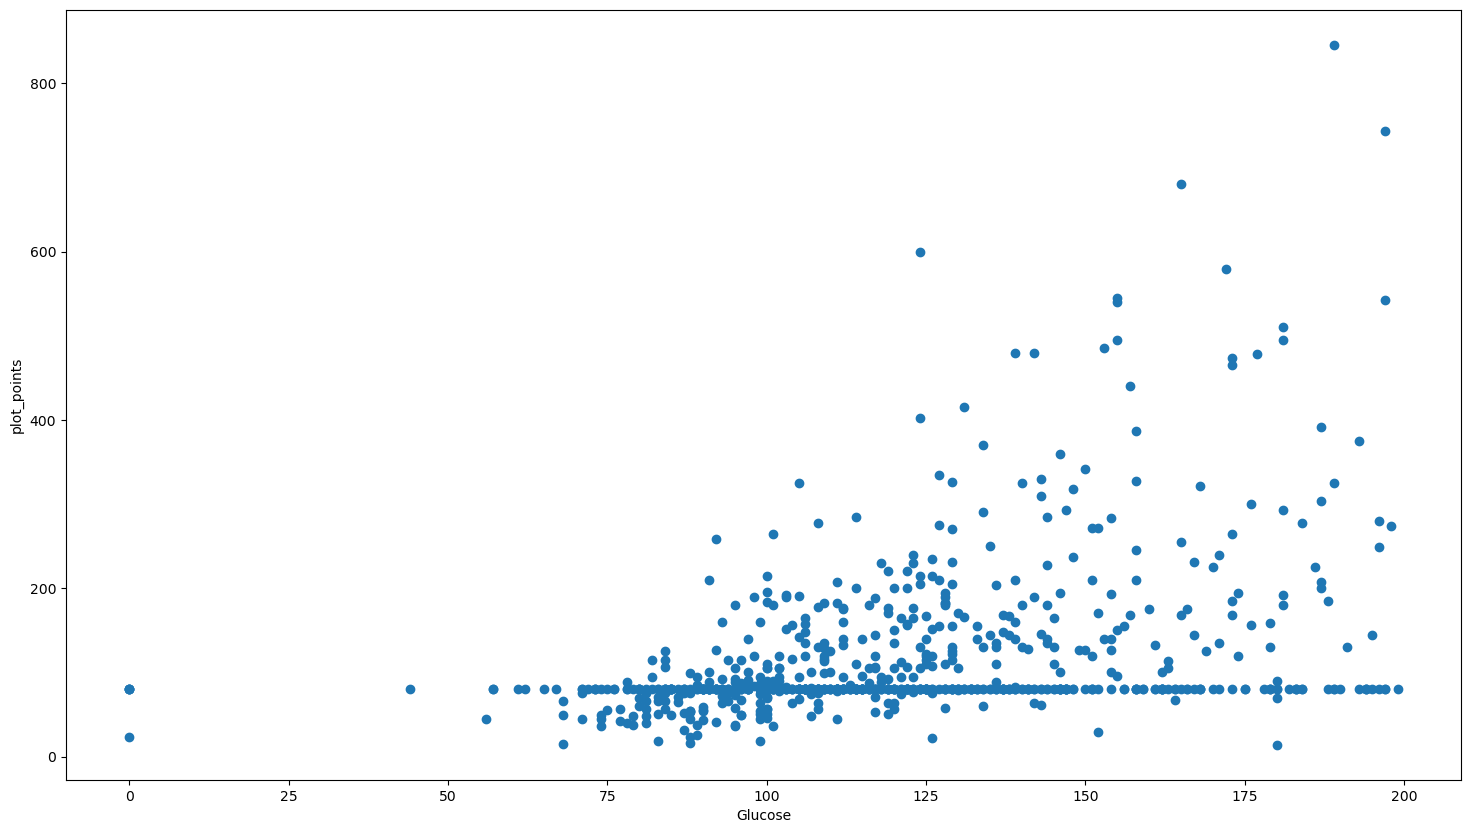

In [28]:
# Scatter plot 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data['Glucose'], data['Insulin'])

# x-axis label
ax.set_xlabel('Glucose')

# y-axis label
ax.set_ylabel('plot_points')
plt.show()


* Here from the above plot we can observe the outliers in the data.
* The dataset consist of error which gives less accuracy in nature. * 

# Conclusion


In [ ]:
# 1)Diabetes is one of the ricks during Pregnancy. It has to be treat to avoid complication0s.
# 2)BMI index can help to avoid complications of diabetes a way before
# 3)Diabetes start showing in age of 35 – 40 and increase with person age.
